In [1]:
## importing libraries

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objects as go
%matplotlib inline

In [2]:
## Loading csv into pandas dataframe
cupid_df = pd.read_csv(r"C:\Users\sghad\OneDrive\Desktop\DA\Final Project\data_set\okcupid_data.csv")

In [3]:
missing_values_education = cupid_df['education'].isnull().sum()
print("Number of missing values in the 'education' column:", missing_values_education)

Number of missing values in the 'education' column: 6628


In [4]:
# Replace similar categories with a common format
cupid_df['education'] = cupid_df['education'].str.replace('graduated from', '')
cupid_df['education'] = cupid_df['education'].str.replace('graduated', '')
cupid_df['education'] = cupid_df['education'].str.replace('working on', '')
cupid_df['education'] = cupid_df['education'].str.replace('dropped out of', 'dropout')

# Replace remaining variations with a standard category
cupid_df['education'] = cupid_df['education'].replace(['space camp', 'two-year college', 'law school', 'med school'], 'other')

# Check the cleaned education categories
print(cupid_df['education'].unique())


[nan ' masters program' 'other' ' two-year college' ' college/university'
 ' law school' 'college/university' ' med school' ' high school'
 'masters program' 'high school' ' space camp' ' ph.d program'
 'dropout college/university' 'dropout high school' 'dropout ph.d program'
 'dropout two-year college' 'dropout masters program' 'dropout space camp'
 'ph.d program' 'dropout med school' 'dropout law school']


In [5]:
# Drop rows with missing education values
cupid_df.dropna(subset=['education'], inplace=True)

In [6]:
# Fill missing education values with the most frequent category
most_frequent_education = cupid_df['education'].mode()[0]
cupid_df['education'].fillna(most_frequent_education, inplace=True)


In [7]:
missing_values_education = cupid_df['education'].isnull().sum()
missing_values_education

0

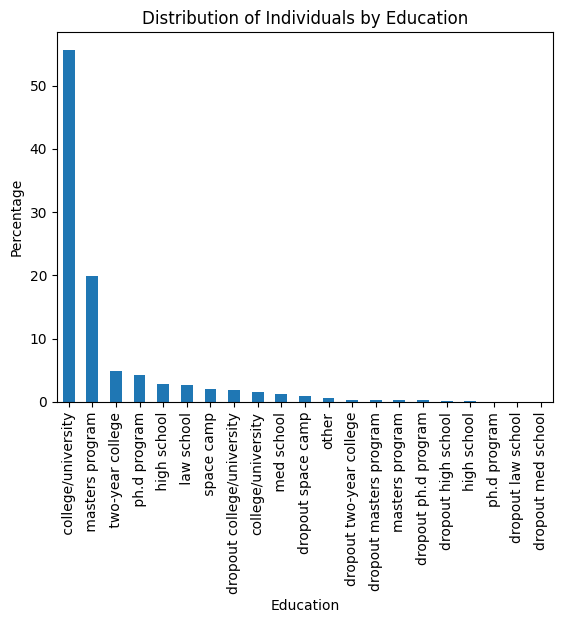

In [8]:
# Calculate the value counts of education categories
education_counts = cupid_df['education'].value_counts()

# Calculate the percentage of each education category
education_percentage = education_counts / education_counts.sum() * 100

# Plot the distribution of individuals by education
education_percentage.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.title('Distribution of Individuals by Education')
plt.show()